# Import libraries for working with data.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib
import optuna
from collections import Counter, defaultdict
from lime import lime_tabular

## Import data sets

In [34]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [5]:
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


# Dataset Feature Description

This dataset contains information about bank customers, with the goal of predicting customer churn. Each entry represents a customer, described by the following features:

- **CustomerId**: A unique identifier assigned to each customer.
- **Surname**: The customer's last name.
- **CreditScore**: A numerical value reflecting the customer’s creditworthiness.
- **Geography**: The country where the customer resides (France, Spain, or Germany).
- **Gender**: The customer's gender (Male or Female).
- **Age**: The customer's age in years.
- **Tenure**: Number of years the customer has been with the bank.
- **Balance**: The current balance in the customer’s account.
- **NumOfProducts**: The number of different banking products the customer is using.
- **HasCrCard**: Indicates whether the customer owns a credit card (1 = Yes, 0 = No).
- **IsActiveMember**: Indicates if the customer is an active account holder (1 = Yes, 0 = No).
- **EstimatedSalary**: An estimation of the customer’s annual income.
- **Exited**: Target variable; indicates whether the customer has left the bank (1 = Yes, 0 = No).
  

# Check for missing values

In [5]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

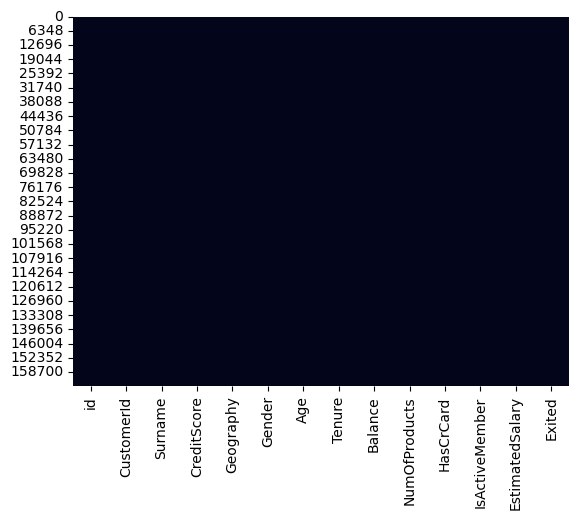

In [4]:
sns.heatmap(train_data.isnull(), cbar=False)

#### There are no missing values in train_data

In [6]:
test_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

<Axes: >

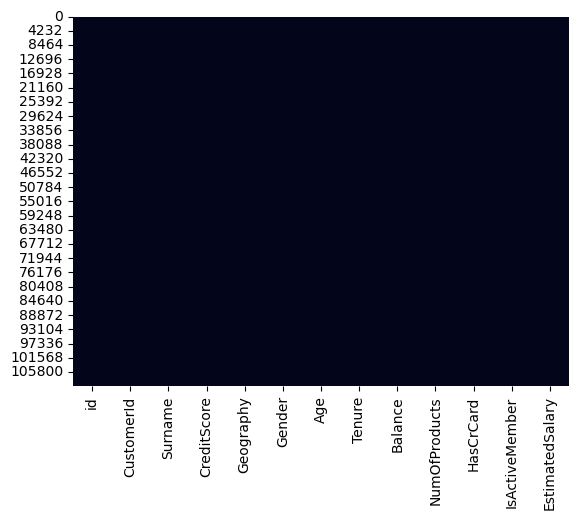

In [5]:
sns.heatmap(test_data.isnull(), cbar=False)

#### There are no missing values in test_data

## Check The Duplicates

In [7]:
train_data.duplicated().sum()

np.int64(0)

In [8]:
test_data.duplicated().sum()

np.int64(0)

#### There are no duplicate values in both data sets

# Initial data analysis

## Dataset shape

In [9]:
train_data.shape

(165034, 14)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Descriptive Analysis

In [11]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [4]:
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [5]:
categorical_cols

['Surname', 'Geography', 'Gender']

In [14]:
numerical_cols

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# Data Visualization

<Axes: title={'center': 'Target variable distribution: Exited'}, xlabel='Exited'>

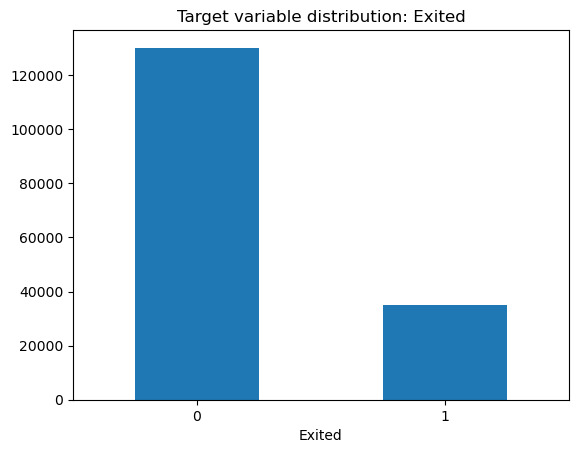

In [15]:
train_data['Exited'].value_counts().plot(kind='bar', title='Target variable distribution: Exited', rot=0)

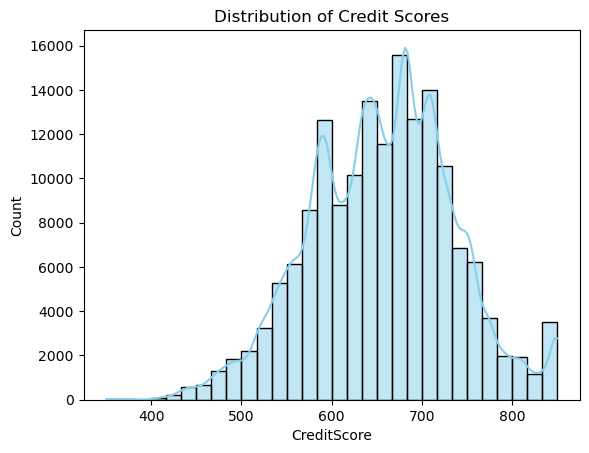

In [16]:
fig, axs = plt.subplots(1, 1)
sns.histplot(train_data['CreditScore'], bins=30, ax=axs, kde=True, color='skyblue')
axs.set_title('Distribution of Credit Scores')
plt.show()

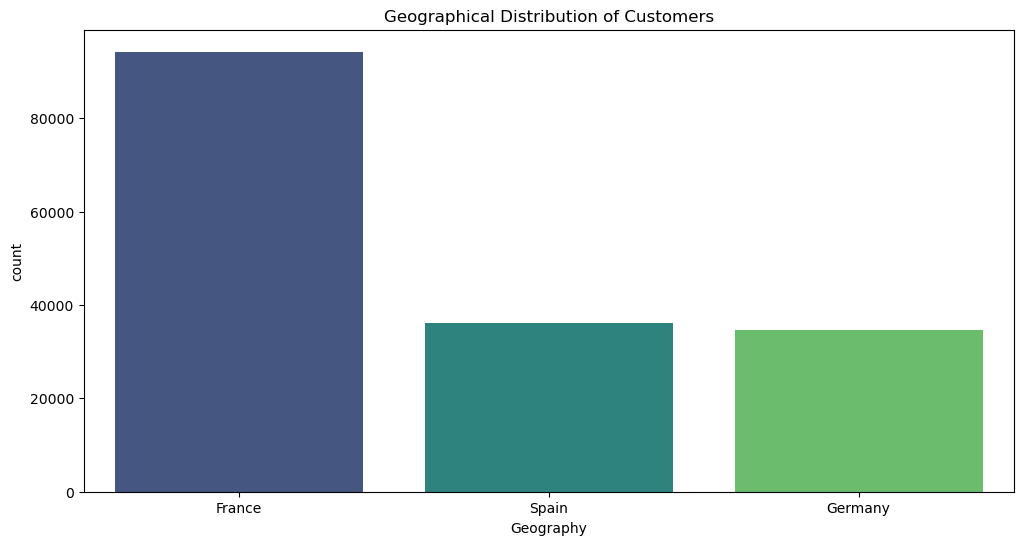

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='Geography', data=train_data, ax=ax, palette='viridis', hue='Geography', legend=False)
ax.set_title('Geographical Distribution of Customers')
plt.show()

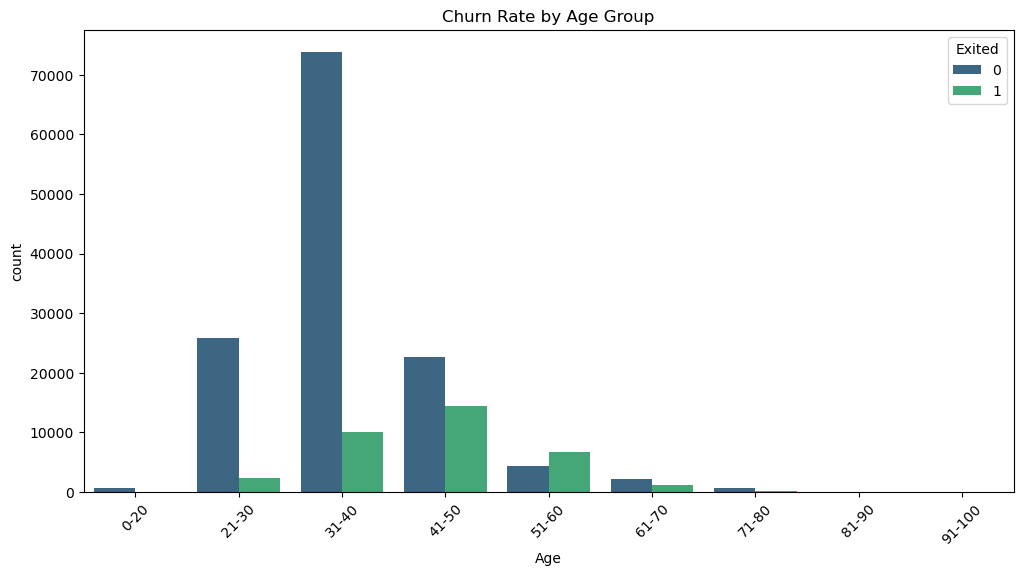

In [18]:
age_groups = pd.cut(train_data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=age_groups, hue=train_data['Exited'], ax=ax, palette='viridis')
ax.set_title('Churn Rate by Age Group')
ax.tick_params(axis='x', rotation=45)

plt.show()

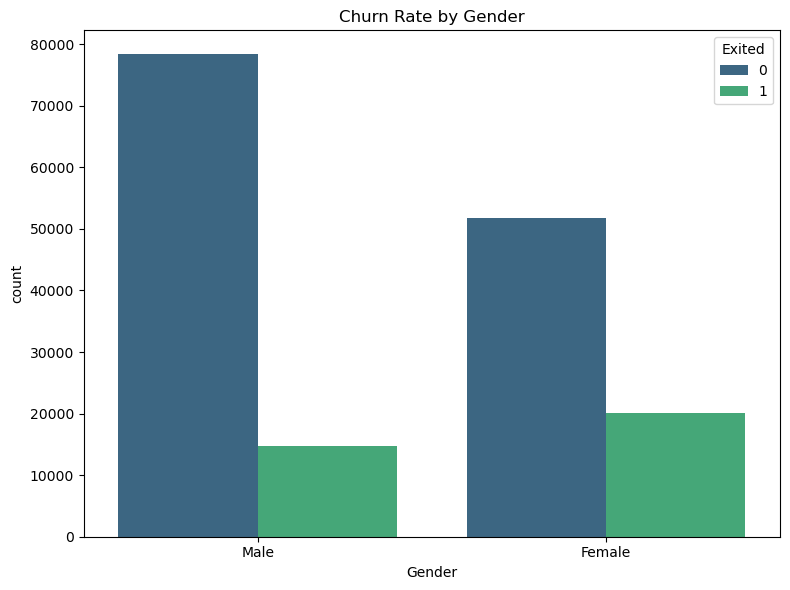

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Gender', hue='Exited', data=train_data, ax=ax, palette='viridis')
ax.set_title('Churn Rate by Gender')
plt.tight_layout()
plt.show()

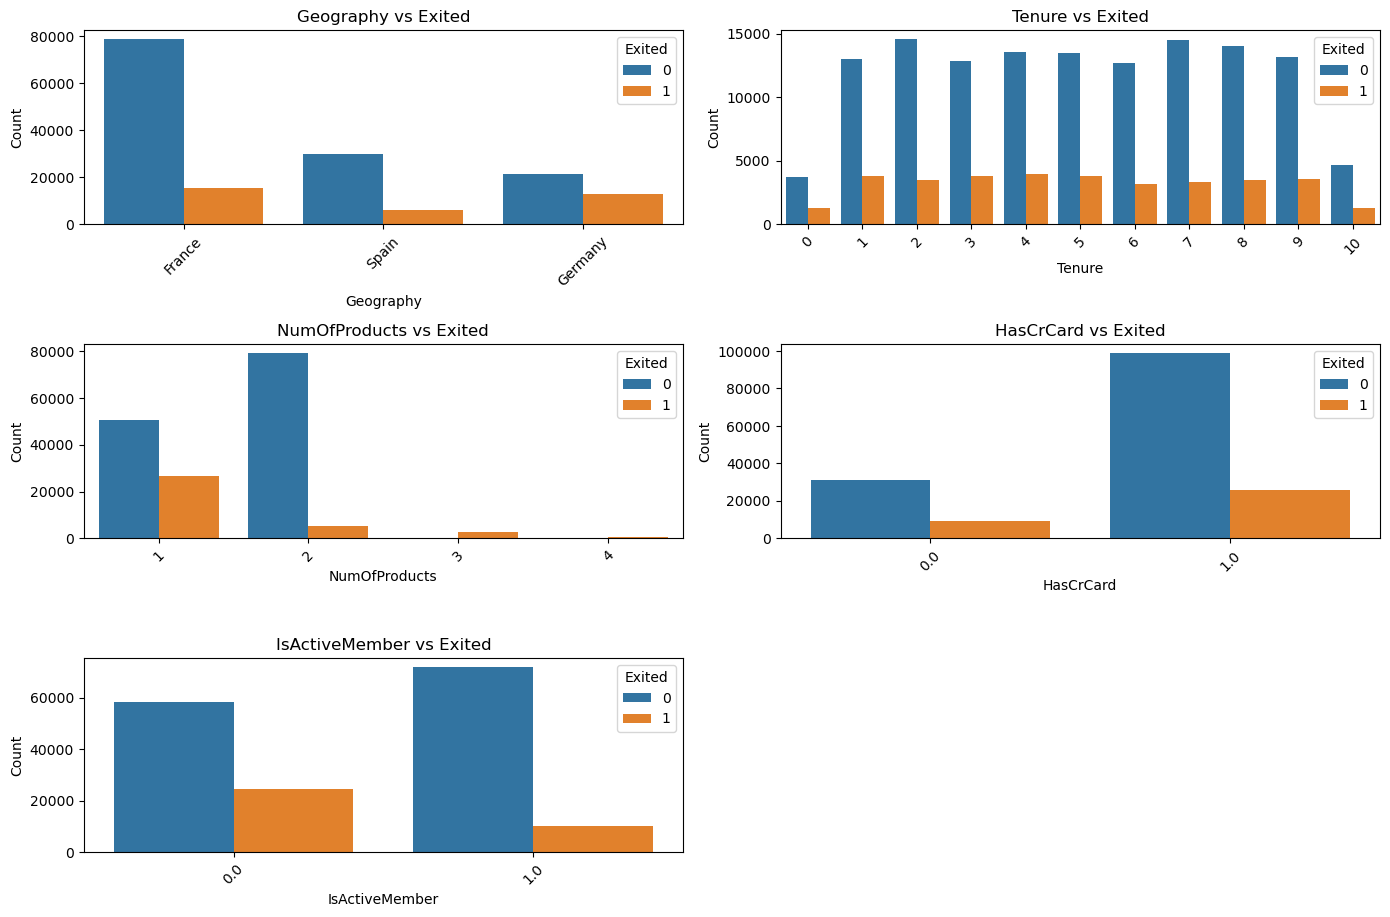

In [18]:
to_plot = ['Geography','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(14, len(to_plot) * 3))

for i, col in enumerate(to_plot):
    plt.subplot(len(to_plot), 2, i + 1)
    sns.countplot(x=col, hue='Exited', data=train_data)
    plt.title(f"{col} vs Exited")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

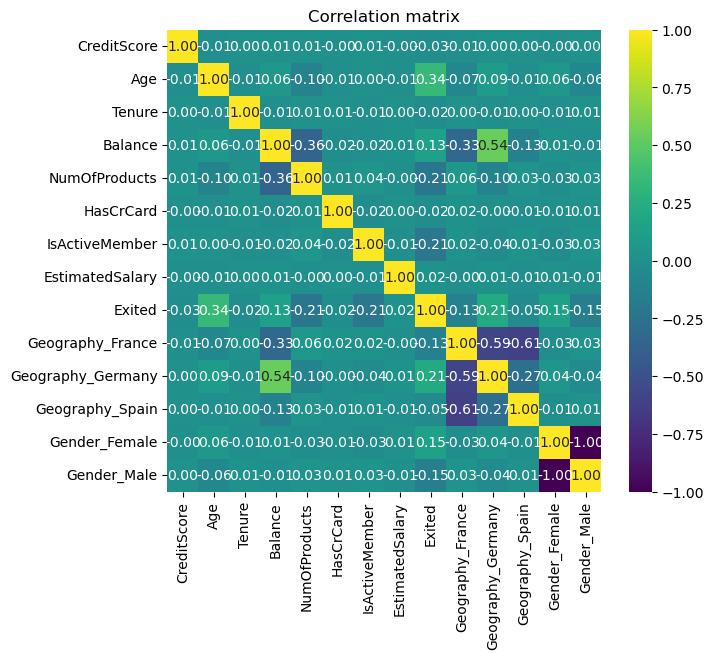

In [4]:
df_for_corr = train_data.drop(columns=['id', 'CustomerId', 'Surname'])

categorical_cols = ['Geography', 'Gender'] 
df_encoded = pd.get_dummies(df_for_corr, columns=categorical_cols)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation matrix')
plt.show()

# Splitting data

In [4]:
train_df = train_data.copy()
test_df = test_data.copy()

### Age categories

In [5]:
def age_group_fair(age):
        if age < 30:
            return 'young_adult'  # 18-29
        elif age < 45:
            return 'middle_adult'  # 30-44
        elif age < 60:
            return 'mature_adult'  # 45-59
        else:
            return 'senior_adult'  # 60+
    
train_df['AgeGroup'] = train_df['Age'].apply(age_group_fair)

In [6]:
train_df['BalanceToSalaryRatio'] = 
          train_df['Balance'] / (train_df['EstimatedSalary'] + 1)

train_df['CreditScoreCategory'] =
            pd.cut(train_df['CreditScore'], 
            bins=[0, 600, 700, 800, 850], 
            labels=['Poor', 'Fair', 'Good', 'Excellent'])

In [7]:
train_df['FinancialActivity'] = (
        (train_df['Balance'] > 0).astype(int) +
        train_df['HasCrCard'].astype(int) + 
        train_df['IsActiveMember'].astype(int) +
        (train_df['NumOfProducts'] > 1).astype(int)
    ) / 4.0

# New columns

- **AgeGroup**: Age categorized into ranges.
- **BalanceToSalaryRatio**: Normalized financial stability indicator.
- **CreditScoreCategory**: Credit score grouped into quality levels.
- **FinancialActivity**: Engagement score based on activity and products.

## Encode categorical columns

In [7]:
#train_df = pd.get_dummies(train_df, columns=['AgeGroup', 'GeoChurnGroup'], drop_first=True, dtype=int)
#train_df.drop(['id', 'CustomerId', 'Surname', 'Gender', 'Geography', 'Age'], axis=1, inplace=True)

In [8]:
train_df = pd.get_dummies(train_df, columns=['AgeGroup'], prefix='Age', drop_first=True, dtype=int)
train_df = pd.get_dummies(train_df, columns=['CreditScoreCategory'], prefix='Credit', drop_first=True, dtype=int) 
train_df = pd.get_dummies(train_df, columns=['Geography'], drop_first=True, dtype=int)

In [9]:
columns_to_drop = ['id', 'CustomerId', 'Surname', 'Age', 'Gender']
train_df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
train_df

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalaryRatio,FinancialActivity,Age_middle_adult,Age_senior_adult,Age_young_adult,Credit_Fair,Credit_Good,Credit_Excellent,Geography_Germany,Geography_Spain
0,668,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.50,1,0,0,1,0,0,0,0
1,627,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.75,1,0,0,1,0,0,0,0
2,678,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.50,1,0,0,1,0,0,0,0
3,581,2,148882.54,1,1.0,1.0,84560.88,0,1.760634,0.75,1,0,0,0,0,0,0,0
4,716,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.75,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0.00,1,1.0,1.0,131834.75,0,0.000000,0.50,1,0,0,1,0,0,0,1
165030,792,3,0.00,1,0.0,0.0,131834.45,0,0.000000,0.00,1,0,0,0,1,0,0,0
165031,565,5,0.00,1,1.0,1.0,127429.56,0,0.000000,0.50,1,0,0,0,0,0,0,0
165032,554,7,161533.00,1,0.0,1.0,71173.03,0,2.269550,0.50,1,0,0,0,0,0,0,1


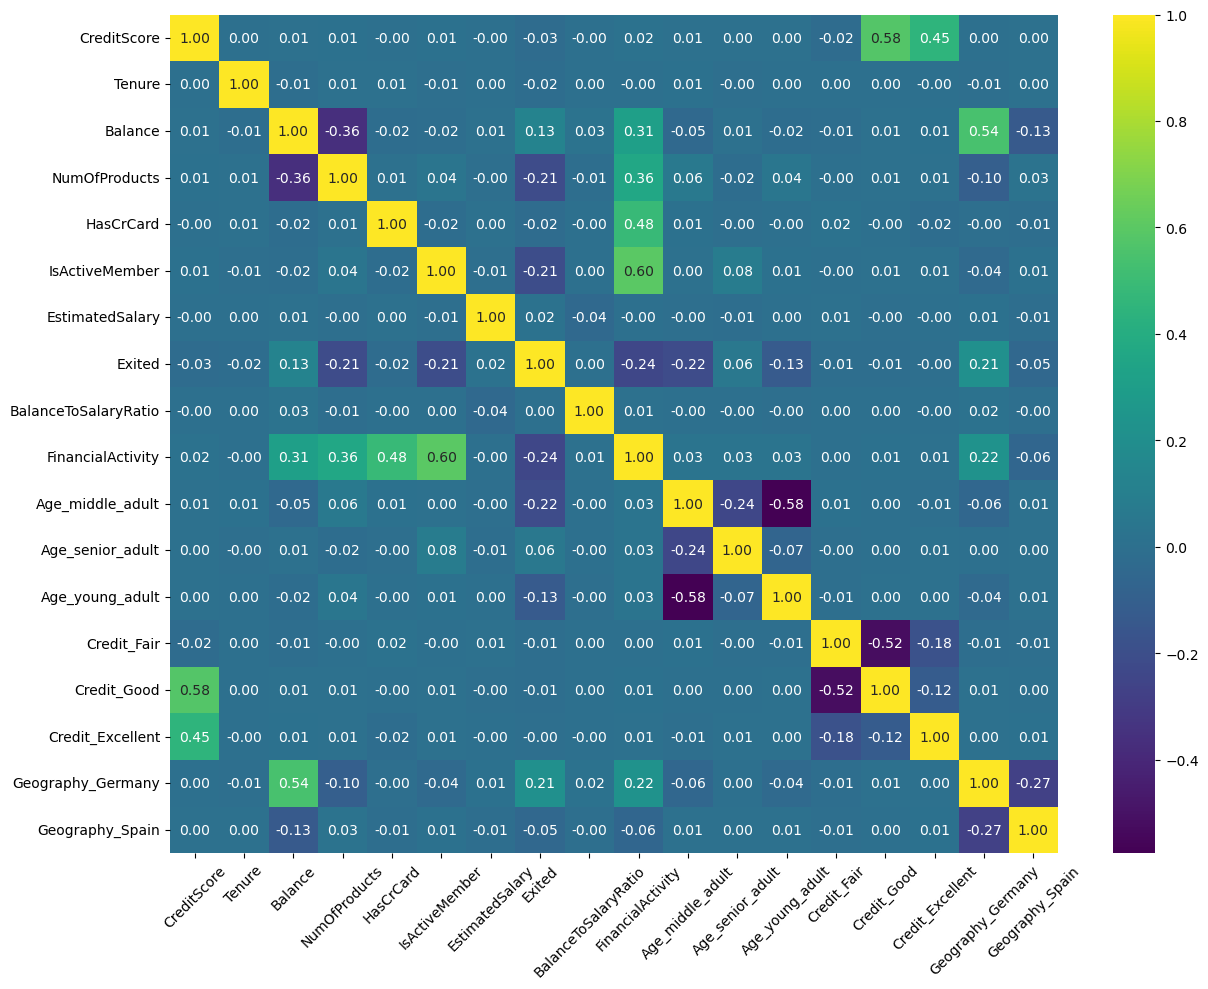

In [24]:
corr = train_df.corr(numeric_only=True)

plt.figure(figsize=(13, 10)) 
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    annot_kws={"size":10} 
)
plt.xticks(rotation=45) 
plt.yticks(rotation=0)   
plt.tight_layout()       
plt.show()

In [11]:
train_df['HasCrCard'] = train_df['HasCrCard'].astype(int)
train_df['IsActiveMember'] = train_df['IsActiveMember'].astype(int)

## Scaling to simple values

In [12]:
scaler = joblib.load("scaler.pkl")

In [13]:
#scaler = StandardScaler()

columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'BalanceToSalaryRatio', 'FinancialActivity']
#columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'GenderBiasIndex']

train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
#test_df[columns_to_scale] = scaler.fit_transform(test_df[columns_to_scale])

In [18]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [18]:
train_df

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalaryRatio,FinancialActivity,Age_middle_adult,Age_senior_adult,Age_young_adult,Credit_Fair,Credit_Good,Credit_Excellent,Geography_Germany,Geography_Spain
0,0.144135,-0.719973,-0.883163,2,1,0,1.369486,0,-0.024155,-0.280064,1,0,0,1,0,0,0,0
1,-0.367706,-1.432694,-0.883163,2,1,1,-1.254085,0,-0.024155,0.888439,1,0,0,1,0,0,0,0
2,0.268974,1.774548,-0.883163,2,1,0,1.437422,0,-0.024155,-0.280064,1,0,0,1,0,0,0,0
3,-0.941966,-1.076334,1.486918,1,1,1,-0.557018,0,-0.003317,0.888439,1,0,0,0,0,0,0,0
4,0.743362,-0.007253,-0.883163,2,1,1,-1.938770,0,-0.024155,0.888439,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-1.076334,-0.883163,1,1,1,0.382957,0,-0.024155,-0.280064,1,0,0,1,0,0,0,1
165030,1.692140,-0.719973,-0.883163,1,0,0,0.382951,0,-0.024155,-2.617072,1,0,0,0,1,0,0,0
165031,-1.141708,-0.007253,-0.883163,1,1,1,0.295366,0,-0.024155,-0.280064,1,0,0,0,0,0,0,0
165032,-1.279031,0.705467,1.688303,1,0,1,-0.823217,0,0.002706,-0.280064,1,0,0,0,0,0,0,1


In [14]:
X = train_df.drop(['Exited'], axis=1)
y = train_df['Exited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing the right estimator/algorithm for the problem

    1 Logistic Regression
    2 K-Nearest Neighbours Classifier
    3 Random Forest Classifier
    4 XGBoost

In [21]:
models = {"Logistic Regression": LogisticRegression(max_iter=10000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier()
         }
           

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test) 
        y_probs = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_probs)
        model_scores[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    return model_scores

In [22]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': {'accuracy': 0.8443966431363045,
  'roc_auc': np.float64(0.8494332106676433)},
 'KNN': {'accuracy': 0.8349138061623292,
  'roc_auc': np.float64(0.8075632178655463)},
 'Random Forest': {'accuracy': 0.8436695246462872,
  'roc_auc': np.float64(0.8532049405585224)},
 'XGBoost': {'accuracy': 0.8547277850152998,
  'roc_auc': np.float64(0.8745898652288963)}}

## 

# Hyperparameter Tuning

### Logistic Regression

In [23]:
model = LogisticRegression(
    solver='liblinear',
    class_weight='balanced'
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Params (LogReg):", grid_search.best_params_)
print("Best ROC AUC (LogReg):", grid_search.best_score_)

best_log_reg_model = grid_search.best_estimator_
joblib.dump(best_log_reg_model, 'best_logistic_model.pkl')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params (LogReg): {'C': 100, 'penalty': 'l2'}
Best ROC AUC (LogReg): 0.8493566725987541


['best_logistic_model.pkl']

### KNN

In [24]:
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Params (KNN):", grid_search.best_params_)
print("Best ROC AUC (KNN):", grid_search.best_score_)

knn = grid_search.best_score_
best_knn_model = grid_search.best_estimator_
joblib.dump(best_knn_model, 'best_knn_model.pkl')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params (KNN): {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
Best ROC AUC (KNN): 0.83656554817014


['best_knn_model.pkl']

### Random Forest

In [28]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 300, 500, 700, 900]),
        "max_depth": trial.suggest_categorical("max_depth", [3, 5, 8, 10, 15, 25]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    model = RandomForestClassifier(
        **params,
        class_weight="balanced", 
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    return np.mean(score)

study = optuna.create_study(direction="maximize", study_name="RandomForest Optuna")
study.optimize(objective, n_trials=15, n_jobs=-1, show_progress_bar=True)

print("Best Parameters:", study.best_params)
print("Best ROC AUC Score:", study.best_value)

final_rf = RandomForestClassifier(
    **study.best_params,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

final_rf.fit(X_train, y_train)

joblib.dump(final_rf, "best_random_forest_model_optuna.pkl")

[I 2025-06-03 19:25:36,513] A new study created in memory with name: RandomForest Optuna


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-06-03 19:32:05,272] Trial 2 finished with value: 0.8610076026702448 and parameters: {'n_estimators': 500, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}. Best is trial 2 with value: 0.8610076026702448.
[I 2025-06-03 19:33:41,786] Trial 3 finished with value: 0.8701451983219168 and parameters: {'n_estimators': 300, 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': False}. Best is trial 3 with value: 0.8701451983219168.
[I 2025-06-03 19:33:59,587] Trial 6 finished with value: 0.8423518501937141 and parameters: {'n_estimators': 300, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': True}. Best is trial 3 with value: 0.8701451983219168.
[I 2025-06-03 19:35:35,987] Trial 0 finished with value: 0.8722277310091613 and parameters: {'n_estimators': 500, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}. Best is trial 0 with value: 0.8722277310091613.
[I 2025-06-03 19:35:52,797] Trial 7 finished with value: 0.8546949172382343 and parameters: {'n_estimators': 300, 'm

['best_random_forest_model_optuna.pkl']

### XGBoost

In [29]:
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 300, 500, 700, 900]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 6, 8, 10, 15]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.03, 0.05, 0.1, 0.2]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.75, 0.9]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.7, 0.9]),
        'gamma': trial.suggest_categorical('gamma', [0, 0.5, 1, 0.01, 0.02]),
        'reg_alpha': trial.suggest_categorical('reg_alpha', [0, 0.5, 1]),
        'reg_lambda': trial.suggest_categorical('reg_lambda', [0.5, 1, 2]),
        'scale_pos_weight': scale_pos_weight, 
        'random_state': 42,
        'n_jobs': -1,
    }

    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    return np.mean(score)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1, show_progress_bar=True)

print("Best Parameters:", study.best_params)
print("Best ROC AUC Score:", study.best_value)

final_model = XGBClassifier(
    **study.best_params,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
)

final_model.fit(X_train, y_train)
joblib.dump(final_model, 'best_xgboost_model_with_balance_optuna.pkl')

[I 2025-06-03 19:53:55,488] A new study created in memory with name: no-name-6bc06bb7-0635-4385-84ab-bd81a8e5033c


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-03 19:54:23,049] Trial 0 finished with value: 0.8567588211193018 and parameters: {'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5, 'gamma': 0, 'reg_alpha': 1, 'reg_lambda': 0.5}. Best is trial 0 with value: 0.8567588211193018.
[I 2025-06-03 19:54:43,694] Trial 3 finished with value: 0.871580152244716 and parameters: {'n_estimators': 700, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.75, 'colsample_bytree': 0.5, 'gamma': 0.01, 'reg_alpha': 0, 'reg_lambda': 1}. Best is trial 3 with value: 0.871580152244716.
[I 2025-06-03 19:55:00,989] Trial 2 finished with value: 0.8701717723135574 and parameters: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5, 'gamma': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5}. Best is trial 3 with value: 0.871580152244716.
[I 2025-06-03 19:55:04,425] Trial 1 finished with value: 0.8719095258785557 and parameters: {'n_estimators': 100, 'max_depth'

['best_xgboost_model_with_balance_optuna.pkl']

# Test models

In [19]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    print(f"=== {model_name} ===")
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("ROC AUC score:", roc_auc_score(y_test, y_probs))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))

In [18]:
best_log_reg_model = joblib.load("best_logistic_model.pkl")
best_knn_model = joblib.load("best_knn_model.pkl")
best_random_forest_model = joblib.load("best_random_forest_model_optuna.pkl")
best_xgboost_model = joblib.load("best_xgboost_model_with_balance_optuna.pkl")

## Logistic Regression

In [32]:
evaluate_model(best_log_reg_model, X_test, y_test, "Logistic Regression")

=== Logistic Regression ===
Accuracy score: 0.7836519526161118
ROC AUC score: 0.85031097181846
Confusion matrix:
 [[20561  5491]
 [ 1650  5305]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85     26052
           1       0.49      0.76      0.60      6955

    accuracy                           0.78     33007
   macro avg       0.71      0.78      0.72     33007
weighted avg       0.83      0.78      0.80     33007



## KNN

In [33]:
evaluate_model(best_knn_model, X_test, y_test, "KNN")

=== KNN ===
Accuracy score: 0.8416699487987397
ROC AUC score: 0.8434053421664109
Confusion matrix:
 [[24528  1524]
 [ 3702  3253]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     26052
           1       0.68      0.47      0.55      6955

    accuracy                           0.84     33007
   macro avg       0.77      0.70      0.73     33007
weighted avg       0.83      0.84      0.83     33007



## Random Forest

In [34]:
evaluate_model(best_random_forest_model, X_test, y_test, "Random Forest")

=== Random Forest ===
Accuracy score: 0.8029205926015693
ROC AUC score: 0.8761022996312303
Confusion matrix:
 [[21158  4894]
 [ 1611  5344]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87     26052
           1       0.52      0.77      0.62      6955

    accuracy                           0.80     33007
   macro avg       0.73      0.79      0.74     33007
weighted avg       0.84      0.80      0.82     33007



## XGBoost

In [35]:
evaluate_model(best_xgboost_model, X_test, y_test, "XGBoost")

=== XGBoost ===
Accuracy score: 0.7973157209076862
ROC AUC score: 0.8786652625181535
Confusion matrix:
 [[20830  5222]
 [ 1468  5487]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     26052
           1       0.51      0.79      0.62      6955

    accuracy                           0.80     33007
   macro avg       0.72      0.79      0.74     33007
weighted avg       0.85      0.80      0.81     33007



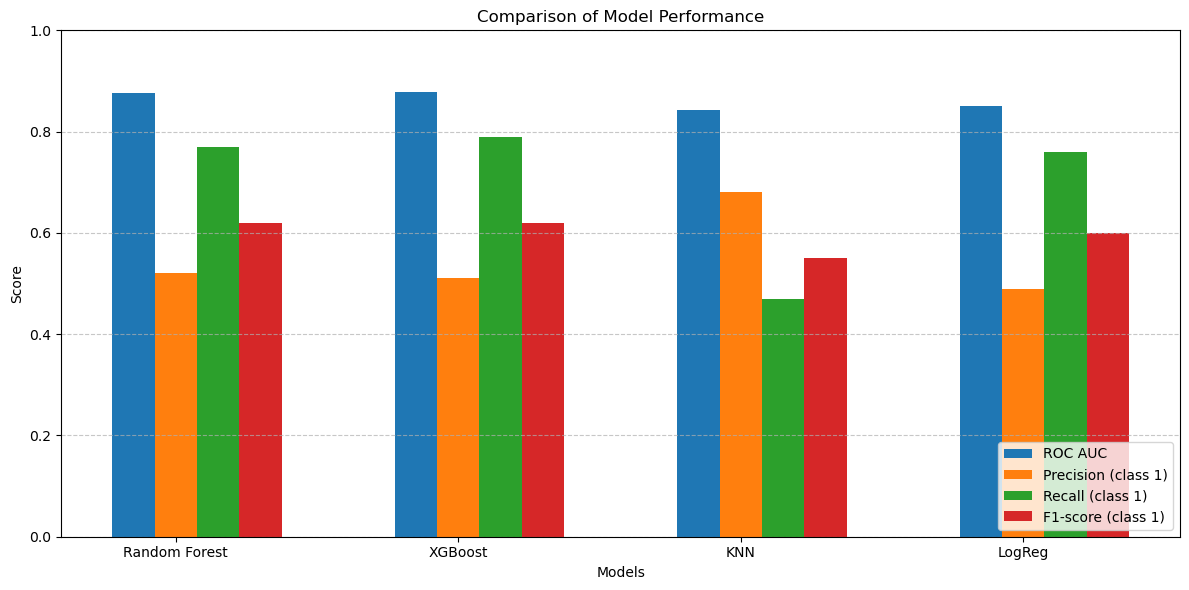

In [35]:
models = ['Random Forest', 'XGBoost', 'KNN', 'LogReg']
roc_auc = [0.876, 0.878, 0.843, 0.850]
precision = [0.52, 0.51, 0.68, 0.49]
recall = [0.77, 0.79, 0.47, 0.76]
f1 = [0.62, 0.62, 0.55, 0.60]

x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(12, 6))
#plt.bar(x - 2*width, accuracy, width, label='Accuracy')
plt.bar(x - width, roc_auc, width, label='ROC AUC')
plt.bar(x, precision, width, label='Precision (class 1)')
plt.bar(x + width, recall, width, label='Recall (class 1)')
plt.bar(x + 2*width, f1, width, label='F1-score (class 1)')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
model = best_xgboost_model

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Stay', 'Go'],
    mode ='classification'
)

i = 2  
exp = explainer.explain_instance(
    data_row = X_test.iloc[i].values,
    predict_fn = model.predict_proba
)

exp.show_in_notebook() 

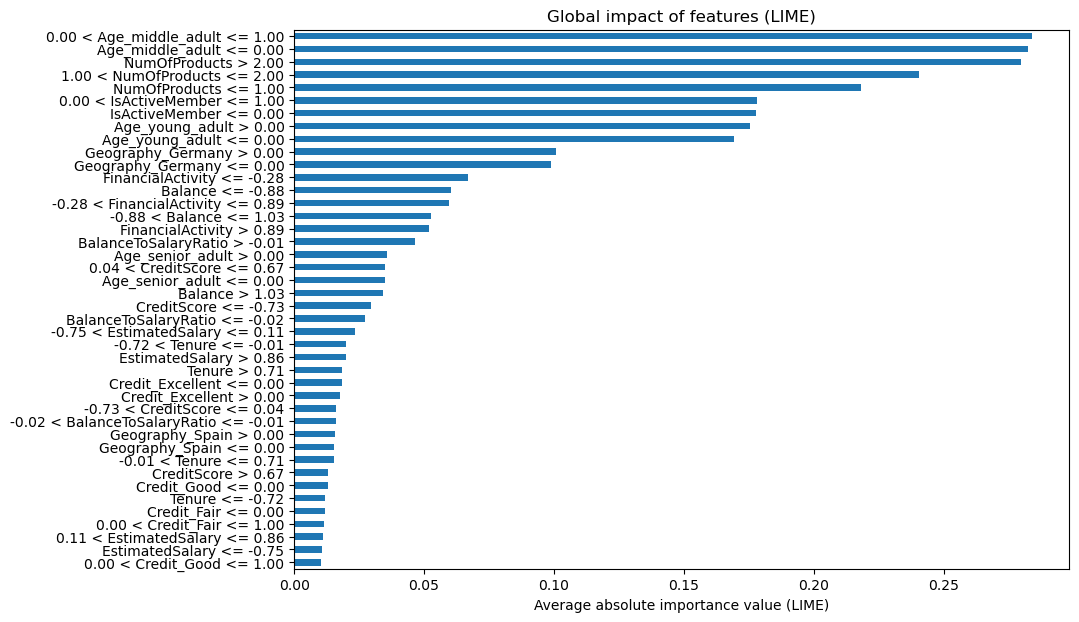

In [21]:
weights = defaultdict(list)

for i in range(10000):
    exp = explainer.explain_instance(
        X_test.iloc[i].values,
        model.predict_proba
    )
    
    for feature, weight in exp.as_list():
        weights[feature].append(abs(weight))  

weights_df = pd.DataFrame({
    feature: pd.Series(values) for feature, values in weights.items()
})

mean_weights = weights_df.mean().sort_values(ascending=False)

mean_weights.plot(kind='barh', figsize=(10, 7))
plt.xlabel('Average absolute importance value (LIME)')
plt.title('Global impact of features (LIME)')
plt.gca().invert_yaxis()
plt.show()